In [1]:
import cv2
from PIL import Image
import os
import glob
import copy
import numpy as np
import matplotlib.pyplot as plt
from random import randint

## FUNGSI KMEANS

In [2]:
def euclidian(data1, data2):
  jarak = np.square(data1 - data2)
  jarak = np.sum(jarak)
  return np.sqrt(jarak)

In [3]:
def kmeans(data_input, k, iter_max=200):
    n_data = data_input.shape[0]
    n_fitur = data_input.shape[1]
    iter = 1
    cluster = np.array([randint(0, k-1) for _ in range(n_data)])
    centroid = np.zeros((k, n_fitur))
    cluster_tidak_berubah = False
    
    while not cluster_tidak_berubah and iter < iter_max:
        jarak = np.zeros((n_data, k))
        for i in range(k):
            if np.any(cluster == i):
                centroid[i, :] = data_input[np.where(cluster == i)[0]].mean(axis=0)
            else:
                # Handle empty clusters by reinitializing the centroid randomly
                centroid[i, :] = data_input[randint(0, n_data - 1)]
        
        for i in range(n_data):
            for j in range(k):
                jarak[i][j] = euclidian(data_input[i], centroid[j])
        
        cluster_baru = [np.argmin(jarak[i]) for i in range(n_data)]
        cluster_tidak_berubah = np.array_equal(cluster_baru, cluster)
        cluster = np.array(copy.deepcopy(cluster_baru))
        iter += 1
        
    return cluster, centroid

## FUNGSI ELBOW

In [4]:
def hitung_ssd(data_input, cluster, centroid):
    ssd = 0
    for i in range(len(data_input)):
        ssd += euclidian(data_input[i], centroid[cluster[i]]) ** 2
    return ssd

In [5]:
def elbow(data_input, max_k):
    ssds = []
    for k in range(1, max_k+1):
        cluster, centroid = kmeans(data_input, k)
        ssd = hitung_ssd(data_input, cluster, centroid)
        ssds.append(ssd)
        print(f"K: {k}, SSD: {ssd}")
    
    plt.plot(range(1, max_k+1), ssds, 'bx-')
    plt.xlabel('Number of clusters K')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal K')
    plt.show()

# IMPLEMENTASI KMEANS

In [6]:
def proses_gambar(gambar, direktori_asli, direktori_kluster, K):
    gambar_asli_path = os.path.join(direktori_asli, os.path.basename(gambar))
    gambar_kluster_path = os.path.join(direktori_kluster, os.path.basename(gambar))
    
    gambar = cv2.imread(gambar)
    gambar_lab = cv2.cvtColor(gambar, cv2.COLOR_BGR2LAB)
    data_gambar = gambar_lab.reshape((-1, 3))

    cluster, centroid = kmeans(data_gambar, K)

    gambar_cluster = centroid[cluster].reshape(gambar.shape)
    gambar_cluster = gambar_cluster.astype(np.uint8)
    gambar_cluster = cv2.cvtColor(gambar_cluster, cv2.COLOR_LAB2BGR)

    # Simpan gambar asli
    cv2.imwrite(gambar_asli_path, gambar)

    # Simpan gambar cluster
    cv2.imwrite(gambar_kluster_path, gambar_cluster)

In [9]:
def proses_gambar(gambar, K):
    gambar = cv2.imread(gambar)
    gambar_lab = cv2.cvtColor(gambar, cv2.COLOR_BGR2LAB)
    data_gambar = gambar_lab.reshape((-1, 3))
    print(data_gambar)

    cluster, centroid = kmeans(data_gambar, K)
    
    gambar_cluster = centroid[cluster].reshape(gambar.shape)
    gambar_cluster = gambar_cluster.astype(np.uint8)
    gambar_cluster = cv2.cvtColor(gambar_cluster, cv2.COLOR_LAB2BGR)

    img_asli = Image.fromarray(cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB))
    img_cluster = Image.fromarray(cv2.cvtColor(gambar_cluster, cv2.COLOR_BGR2RGB))
    img_asli.show()
    img_cluster.show()

# IMPLEMENTASI ELBOW

In [8]:
def proses_elbow(gambar):
   gambar = cv2.imread(gambar)
   gambar_lab = cv2.cvtColor(gambar, cv2.COLOR_BGR2LAB)
   data_gambar = gambar_lab.reshape((-1, 3))

   elbow(data_gambar, 10)

### TESTING ELBOW

K: 1, SSD: 224849920.09596962
K: 2, SSD: 69179775.22064562
K: 3, SSD: 25636658.24880672
K: 4, SSD: 15366160.20387499
K: 5, SSD: 10378183.279776894
K: 6, SSD: 7982152.527434921
K: 7, SSD: 7246577.336941315
K: 8, SSD: 5767121.344937203
K: 9, SSD: 5395638.068174796
K: 10, SSD: 4513494.057059535


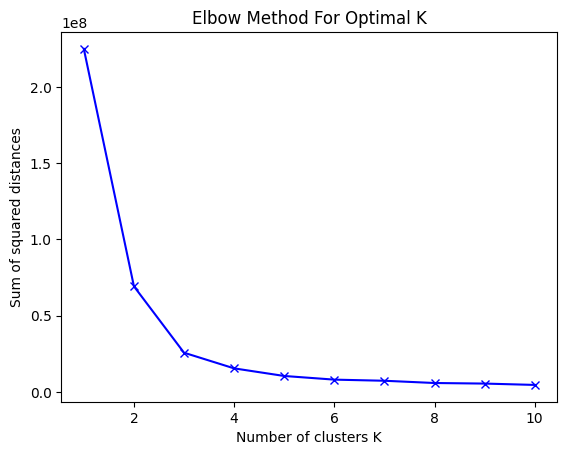

In [21]:
proses_elbow('r0_3.jpg')

In [10]:
proses_gambar('miaw/test/r0_67.jpg', 5)

[[255 128 128]
 [255 128 128]
 [255 128 128]
 ...
 [255 128 128]
 [255 128 128]
 [255 128 128]]


KeyboardInterrupt: 

In [10]:
direktori_utama = 'miaw'

# Buat direktori jika belum ada
direktori_asli_10 = os.path.join(direktori_utama, 'asli_10')
direktori_kluster_10 = os.path.join(direktori_utama, 'kluster_10')
os.makedirs(direktori_asli_10, exist_ok=True)
os.makedirs(direktori_kluster_10, exist_ok=True)

# Loop melalui setiap direktori dalam direktori utama
for direktori in os.listdir(direktori_utama):
    path_direktori = os.path.join(direktori_utama, direktori)
    if os.path.isdir(path_direktori):
        # Loop melalui setiap file gambar dalam direktori
        for file_gambar in glob.glob(os.path.join(path_direktori, '*.jpg')):
            proses_gambar(file_gambar, direktori_asli_10, direktori_kluster_10, 10)